In [1]:
!pip install pubchempy

  Stored in directory: /home/dsxuser/.cache/pip/wheels/10/4d/51/6b843681a9a5aef35f0d0fbce243de46f85080036e16118752
Successfully built pubchempy


In [2]:
import pubchempy as pcp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pickle
import PIL
from PIL import Image
from IPython.display import display
from PIL import ImageDraw,ImageFont
%matplotlib inline

#save data as csv

In [3]:
try:
    pcp.Compound.from_cid(783,record_type='3d')
except pcp.PubChemHTTPError:
    print('trying 2d')
    pcp.Compound.from_cid(783,record_type='2d')

trying 2d


### Unique Pairs in Kaggle competition
### ['c_h',  'h_h',  'h_n']

In [4]:
cid_dict={
    #alkane
    6324:'ethane',
    8058:'hexane',
    #branched alkane
    11269:'2,3,4-trimethylpentane',
    6360:'2-methylpropane',
    #alkene
    6325:'ethene',
    7845:'1,3-butadiene',
    #alkyne
    6335:'Propyne',
    13568:'3-hexyne',
    #benzene & derivatives
    241:'benzene',
    931:'Naphthalene',
    7929:'M-Xylene',
    6115:'Aniline',
    996:'Phenol',
    243:'Benzoic acid',
    240:'Benzaldehyde',
    10390:'diphenylacetylene',
    #alcohol
    887:'Methanol',
    6386:'tert-Butyl alcohol',
    #ketone
    6569:'Methyl ethyl ketone',
    #aldehyde
    177:'Acetaldehyde',
    #acid
    176:'Acetic acid',
    #ether
    3283:'Diethyl ether',
    #amines (N-H, N-C)
    6329:'Methylamine',
    674:'Dimethylamine',
    1146:'Trimethylamine',
    140746:'Ethanimine',
    222:'ammonia',
    12246:'2-Pentanamine',
    7732:'p-Anisidine',
    9964:'4-(Trifluoromethyl)aniline',
    77628:'N,N-Diisopropylethylenediamine',
    144018:'N,N-Diisopropyl-1,3-propanediamine',
    66978:'N,N′-Dimethyl-1,3-propanediamine',
    566545:'2-Isopropyl-2-oxazoline',
    6319:'N,N′-Diphenyl-p-phenylenediamine',
    106705:'1-[Bis[3-(dimethylamino)propyl]amino]-2-propanol',
    9237:'Dabco',
    74209:'1,6-Diaminohexane-N,N,N,N-tetraacetic acid',
    74348:'2-[2-(Dimethylamino)ethoxy]ethanol',
    18196:'N,N,N′,N′′,N′′-Pentamethyldiethylenetriamine',
    143710:'N,N,N′,N′-Tetraethyl-1,3-propanediamine',
    66074:'N,N,N′,N′-Tetramethyl-1,4-butanediamine ',
    5365279:'N,N,N′,N′-Tetramethyl-2-butene-1,4-diamine ',
    123502:'1,4,8,11-Tetramethyl-1,4,8,11-tetraazacyclotetradecane',
    7952:'1,3,5-Trimethylhexahydro-1,3,5-triazine ',

    5962:'Lysine',
    #cynate
    137201:'Methylcyanate',
    12228:'Methyl isocyanate',
    11646:'Methyl isocyanide',
    #random
    135504501:'rand_1',
    #O-O bonds:
    6410:'Tert-butyl hydroperoxide',
    784:'Hydrogen peroxide',
    8033:'Di-tert-butyl peroxide',
    24823:'ozone',
    #N-N-N bonds:
    69319:'Azidobenzene',
    33558:'Azide ion',
    #N-O bonds:
    8053:'3-Methylbutyl nitrite',
    6375:'Nitromethane',
    11473:'Nitrosobenzene',
    67180:'Acetone oxime',
    24529:'Nitrous acid',
    #C-F/H-F bonds:
    11638:'Fluoromethane',
    14917:'Hydrofluoric acid',
    6393:'Carbon tetrafluoride',
    127602:'Acetyl hypofluorite',
    552549:'(Trifluoromethyl)trimethylsilane',
    5206:'Sevoflurane',
    #F-O bonds:
    24547:'Oxygen difluoride',
    123257:'Fluorine dioxide',
    #H-H:
    783:'Hydrogen'

}

In [5]:
compounds_dict={}
def get_df(cid,name='compound'):
  print(name)
  #print('{}:\tAccessing Properties & creating dataframe...'.format(name))
  if cid not in compounds_dict.keys():
    try:
        comp=pcp.Compound.from_cid(cid,record_type='3d')
    except pcp.PubChemHTTPError:
        comp=pcp.Compound.from_cid(cid,record_type='2d')
    compounds_dict[cid]=comp
  else:
    comp=compounds_dict[cid]
  aids=[]
  atoms_ele={}
  atoms_x={}
  atoms_y={}
  atoms_z={}
  atoms_charge={}
  for atom in comp.atoms:
    aid=atom.aid
    aids.append(aid)
    atoms_ele[aid]=atom.element
    atoms_x[aid]=atom.x
    atoms_y[aid]=atom.y
    atoms_z[aid]=atom.z
    atoms_charge[aid]=atom.charge
  pairs=list(itertools.product(aids,repeat=2))
  pairs=list(filter(lambda x:x[0]!=x[1],pairs))
  df=pd.DataFrame()
  df['cid']=[cid]*len(pairs)
  df['aid1']=list(map(lambda x:x[0],pairs))
  df['aid2']=list(map(lambda x:x[1],pairs))
  df['atom1']=df['aid1'].map(atoms_ele)
  df['atom2']=df['aid2'].map(atoms_ele)
  df['x_1']=df['aid1'].map(atoms_x)
  df['y_1']=df['aid1'].map(atoms_y)
  df['z_1']=df['aid1'].map(atoms_z)
  df['x_2']=df['aid2'].map(atoms_x)
  df['y_2']=df['aid2'].map(atoms_y)
  df['z_2']=df['aid2'].map(atoms_z)
  df['atom1_charge']=df['aid1'].map(atoms_charge)
  df['atom2_charge']=df['aid2'].map(atoms_charge)
  df['bond']=0
  for bond in comp.bonds:
    df.loc[(df['aid1']==bond.aid1) & (df['aid2']==bond.aid2),'bond']=1

  #sanity check
  assert df[df['bond']==1].shape[0]==len(comp.bonds),'Number of bonds in df: {}\nNumber of bonds in compound:{}'.format(df[df['bond']==1].shape[0],len(comp.bonds))
  return df

In [6]:
df_dict={}
for cid,name in cid_dict.items():
    df_dict[name]=get_df(cid,name=name)
#concatenating dataframe
data=pd.concat(df_dict.values(),ignore_index=True)
data.head()

ethane
hexane
2,3,4-trimethylpentane
2-methylpropane
ethene
1,3-butadiene
Propyne
3-hexyne
benzene
Naphthalene
M-Xylene
Aniline
Phenol
Benzoic acid
Benzaldehyde
diphenylacetylene
Methanol
tert-Butyl alcohol
Methyl ethyl ketone
Acetaldehyde
Acetic acid
Diethyl ether
Methylamine
Dimethylamine
Trimethylamine
Ethanimine
ammonia
2-Pentanamine
p-Anisidine
4-(Trifluoromethyl)aniline
N,N-Diisopropylethylenediamine
N,N-Diisopropyl-1,3-propanediamine
N,N′-Dimethyl-1,3-propanediamine
2-Isopropyl-2-oxazoline
N,N′-Diphenyl-p-phenylenediamine
1-[Bis[3-(dimethylamino)propyl]amino]-2-propanol
Dabco
1,6-Diaminohexane-N,N,N,N-tetraacetic acid
2-[2-(Dimethylamino)ethoxy]ethanol
N,N,N′,N′′,N′′-Pentamethyldiethylenetriamine
N,N,N′,N′-Tetraethyl-1,3-propanediamine
N,N,N′,N′-Tetramethyl-1,4-butanediamine 
N,N,N′,N′-Tetramethyl-2-butene-1,4-diamine 
1,4,8,11-Tetramethyl-1,4,8,11-tetraazacyclotetradecane
1,3,5-Trimethylhexahydro-1,3,5-triazine 
Lysine
Methylcyanate
Methyl isocyanate
Methyl isocyanide
rand_1
Te

,cid,aid1,aid2,atom1,atom2,x_1,y_1,z_1,x_2,y_2,z_2,atom1_charge,atom2_charge,bond
0,6324,1,2,C,C,-0.756,0.0,0,0.7560,0.0000,0,0,0,1
1,6324,1,3,C,H,-0.756,0.0,0,-1.1404,0.6586,0.7845,0,0,1
2,6324,1,4,C,H,-0.756,0.0,0,-1.1404,0.3501,-0.9626,0,0,1
3,6324,1,5,C,H,-0.756,0.0,0,-1.1405,-1.0087,0.1781,0,0,1
4,6324,1,6,C,H,-0.756,0.0,0,1.1404,-0.3501,0.9626,0,0,0


In [7]:
data.shape

(27776, 14)

In [8]:
print('Compound in cid_dict: '+str(len(df_dict.keys())))
print('Downloaded Compounds: '+str(len(compounds_dict)))

Compound in cid_dict: 70
Downloaded Compounds: 70


## Unique atoms in the data

In [9]:
data['atom1'].unique()

array(['C', 'H', 'N', 'O', 'F', 'Si'], dtype=object)

In [10]:
!wget https://github.com/ss-ghule/misc_or_test_repo/raw/master/BASKVILL.TTF 

--2019-09-02 13:02:13--  https://github.com/ss-ghule/misc_or_test_repo/raw/master/BASKVILL.TTF
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ss-ghule/misc_or_test_repo/master/BASKVILL.TTF [following]
--2019-09-02 13:02:14--  https://raw.githubusercontent.com/ss-ghule/misc_or_test_repo/master/BASKVILL.TTF
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54976 (54K) [application/octet-stream]
Saving to: ‘BASKVILL.TTF’

100%[======================================>] 54,976      --.-K/s   in 0.003s  

2019-09-02 13:02:14 (20.5 MB/s) - ‘BASKVILL.TTF’ saved [54976/54976]



In [11]:
#!head -3 BASKVILL.TTF

In [12]:
def process_img(img,mode,caption):
  img=img.convert(mode)
  draw=ImageDraw.Draw(img)
  w=img.width
  h=img.height
  draw.rectangle([0,0,w,h],fill=None,outline='red',width=2)
  font = ImageFont.truetype("BASKVILL.TTF", 20)
  draw.text((0.3*w,0.9*h),caption,fill='black',font=font)
  return img

In [29]:
def display_molecules(cid_dict):
  for cid,name in cid_dict.items():
    print(name,end='\r')
    try:
        pcp.download('png',str(cid)+'.png',cid,image_size='large',record_type='3d',overwrite=True)
    except pcp.PubChemHTTPError:
        pcp.download('png',str(cid)+'.png',cid,image_size='large',record_type='2d',overwrite=True)
  ref_cid=list(cid_dict.keys())[0]
  ref_img=Image.open(str(ref_cid)+'.png')
  col=10
  row=int(np.ceil(len(cid_dict)/10))
  contact_sheet=Image.new(ref_img.mode,(ref_img.width*col,ref_img.height*row))
  x=0
  y=0
  for i,cid in enumerate(cid_dict.keys()):
    img=Image.open(str(cid)+'.png')
    img=process_img(img,ref_img.mode,cid_dict[cid])
    contact_sheet.paste(img,(x,y))
    if (i+1)%10==0:
      x=0
      y+=ref_img.height
    else:
      x+=ref_img.width
  contact_sheet=contact_sheet.resize((1000,row*100))
  display(contact_sheet)
  #return contact_sheet

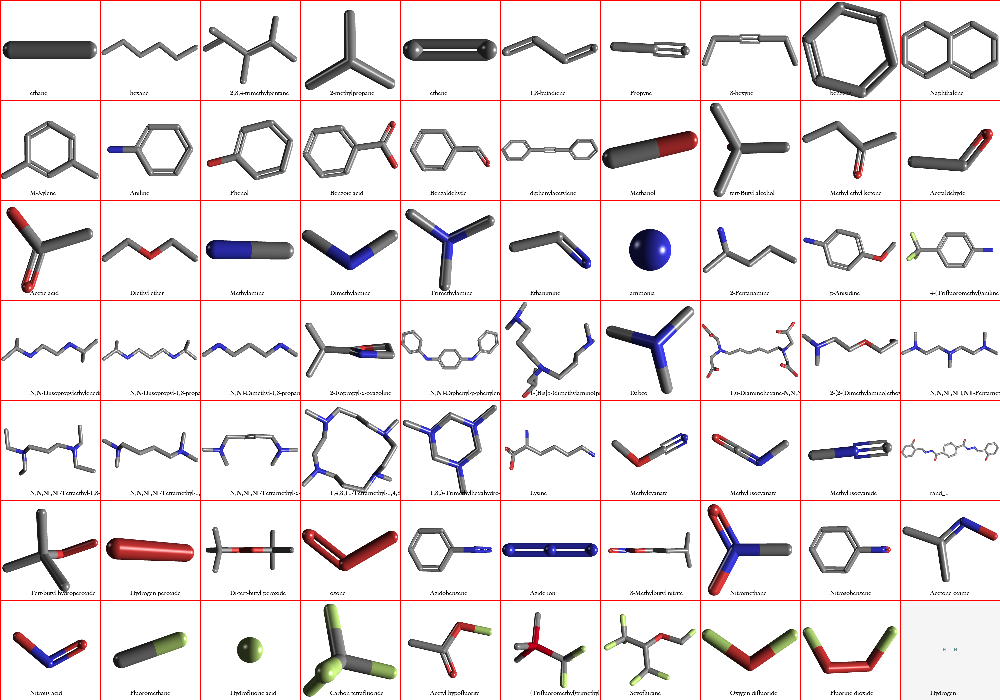

In [30]:
display_molecules(cid_dict)

# Serialize the data

In [15]:
data.to_csv('data_raw.csv',index=False)

In [16]:
!ls

10390.png   135504501.png  241.png	6115.png  66074.png  7929.png
106705.png  13568.png	   243.png	6319.png  66978.png  7952.png
11269.png   137201.png	   24529.png	6324.png  67180.png  8033.png
1146.png    140746.png	   24547.png	6325.png  674.png    8053.png
11473.png   143710.png	   24823.png	6329.png  69319.png  8058.png
11638.png   144018.png	   3283.png	6335.png  74209.png  887.png
11646.png   14917.png	   33558.png	6360.png  74348.png  9237.png
12228.png   176.png	   5206.png	6375.png  7732.png   931.png
12246.png   177.png	   5365279.png	6386.png  77628.png  9964.png
123257.png  18196.png	   552549.png	6393.png  783.png    996.png
123502.png  222.png	   566545.png	6410.png  7845.png   BASKVILL.TTF
127602.png  240.png	   5962.png	6569.png  784.png    data_raw.csv


In [17]:
!head -5 data_raw.csv

cid,aid1,aid2,atom1,atom2,x_1,y_1,z_1,x_2,y_2,z_2,atom1_charge,atom2_charge,bond
6324,1,2,C,C,-0.756,0.0,0.0,0.756,0.0,0.0,0,0,1
6324,1,3,C,H,-0.756,0.0,0.0,-1.1404,0.6586,0.7845,0,0,1
6324,1,4,C,H,-0.756,0.0,0.0,-1.1404,0.3501,-0.9626,0,0,1
6324,1,5,C,H,-0.756,0.0,0.0,-1.1405,-1.0087,0.1781,0,0,1


In [18]:
test_data=pd.read_csv('data_raw.csv')

In [19]:
test_data.head()

,cid,aid1,aid2,atom1,atom2,x_1,y_1,z_1,x_2,y_2,z_2,atom1_charge,atom2_charge,bond
0,6324,1,2,C,C,-0.756,0.0,0.0,0.7560,0.0000,0.0000,0,0,1
1,6324,1,3,C,H,-0.756,0.0,0.0,-1.1404,0.6586,0.7845,0,0,1
2,6324,1,4,C,H,-0.756,0.0,0.0,-1.1404,0.3501,-0.9626,0,0,1
3,6324,1,5,C,H,-0.756,0.0,0.0,-1.1405,-1.0087,0.1781,0,0,1
4,6324,1,6,C,H,-0.756,0.0,0.0,1.1404,-0.3501,0.9626,0,0,0


In [20]:
data.head()

,cid,aid1,aid2,atom1,atom2,x_1,y_1,z_1,x_2,y_2,z_2,atom1_charge,atom2_charge,bond
0,6324,1,2,C,C,-0.756,0.0,0,0.7560,0.0000,0,0,0,1
1,6324,1,3,C,H,-0.756,0.0,0,-1.1404,0.6586,0.7845,0,0,1
2,6324,1,4,C,H,-0.756,0.0,0,-1.1404,0.3501,-0.9626,0,0,1
3,6324,1,5,C,H,-0.756,0.0,0,-1.1405,-1.0087,0.1781,0,0,1
4,6324,1,6,C,H,-0.756,0.0,0,1.1404,-0.3501,0.9626,0,0,0


In [21]:
test_data.shape

(27776, 14)

In [22]:
data.shape

(27776, 14)

# Upload data to IBM object store

In [23]:
!ls

10390.png   135504501.png  241.png	6115.png  66074.png  7929.png
106705.png  13568.png	   243.png	6319.png  66978.png  7952.png
11269.png   137201.png	   24529.png	6324.png  67180.png  8033.png
1146.png    140746.png	   24547.png	6325.png  674.png    8053.png
11473.png   143710.png	   24823.png	6329.png  69319.png  8058.png
11638.png   144018.png	   3283.png	6335.png  74209.png  887.png
11646.png   14917.png	   33558.png	6360.png  74348.png  9237.png
12228.png   176.png	   5206.png	6375.png  7732.png   931.png
12246.png   177.png	   5365279.png	6386.png  77628.png  9964.png
123257.png  18196.png	   552549.png	6393.png  783.png    996.png
123502.png  222.png	   566545.png	6410.png  7845.png   BASKVILL.TTF
127602.png  240.png	   5962.png	6569.png  784.png    data_raw.csv


In [24]:
# The code was removed by Watson Studio for sharing.

In [25]:
upload_file_cos(credentials_1,'data_raw.csv','data_raw.csv')

File Uploaded
